# BME 230B Assignment 2

In [1]:
import scanpy as sc
pbmc = sc.read('PBMC.merged.h5ad')
print(pbmc)

AnnData object with n_obs × n_vars = 15476 × 1199 
    obs: 'Sample', 'n_counts', 'n_genes', 'batch', 'louvain', 'anno', 'Method', 'Cell type'
    var: 'GeneName-0', 'GeneID-0', 'GeneName-1', 'GeneID-1', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cell type_colors', 'Method_colors', 'Sample_colors', 'anno_colors', 'louvain', 'louvain_colors', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'


### euclid_knn.py

In [25]:
#! /usr/bin/env python


#EXAMPLE USAGE
#1st run PCA with sklearn pca module (use 50 componenets)
# euclid_knn(adata, pc=50) #make function update adata.obsm['X_pca']
# clf = knnG(adata=adata, d_metric='euclidean', n_neighbors=12) #method is always umap
# knn_indices, knn_distances = clf.get_knn()
# note that the updating of the adata object needs to be done within the get_knn() method



from scipy.sparse import issparse
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from scanpy.neighbors import compute_connectivities_umap #look into this function on scanpy's documentation to see what arguments need to be passed


#pca using sklearn's pca
def pca(adata, pc=15):
    sklpca = PCA(n_components = pc)
    adata.obsm['X_pca'] = sklpca.fit_transform(adata.X)
    return adata.obsm['X_pca']

    
class knnG():
    def __init__(self, adata = None, d_metric='euclidean', n_neighbors=15, method='umap'):
        self.adata = adata
        self.d_metric = d_metric
        self.n_neighbors = n_neighbors
        self.method = method
        
        adata.uns['neighbors']['connectivities'] = None
        adata.uns['neighbors']['distances'] = None
        
        
    def update_adata(self):
        print('updating adata object...')
        self.adata.uns['neighbors']={}
        self.adata.uns['neighbors']['params'] = {}
        self.adata.uns['neighbors']['params']['n_neighbors']=self.n_neighbors
        self.adata.uns['neighbors']['params']['method'] = self.method
        
        self.adata.uns['neighbors']['connectivities'] = self.connectivities
        self.adata.uns['neighbors']['distances'] = self.distances
    
    def get_distances(self):
        df = pd.DataFrame(pbmc.obsm['X_pca'])
        return pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
    
    def get_neighbors(self, D):
        pass
    
    def get_umap_connectivities(self, knn_d, knn_i):
        D = get_distances(self.adata.obsm['X_pca'])
        return sc.neigbors.compute_connectivities_umap(D)
    
    def get_knn(self):
        pass

### euclid_bbknn.py

In [ ]:
#! /usr/bin/env/ python

import numpy as np
import scipy
from knn import knnG
from sklearn.metrics import pairwise_distances
from scanpy.neighbors import compute_connectivities_umap

#EXAMPLE USAGE
# >>> clf = bbknn_graph(adata, batchlabel='label', neighbors_within_batch=6, pcs=50) #method is always umap
# >>> bbknn_indices, bbknn_distances = clf.bbknn() #this will compute batch balanced neighbors with your choice of neighbors_within_batch
# >>> l_k_bbknn_indices, l_k_bbknn_distances = clf.l_k_bbknn(l=3) # this will compute a subsample of your bbknn by using the knn indices and distances computed by clf.bbknn()


class bbknn_graph():
    '''
    Function performs batched balanced knn
    INPUT: 
        1. adata object with PCA done on it already
        2. batch label
        3. neighbors within each batch
    
    Output: new knn distances and connectivites with shape (n_observations, n_neighbors*n_batches)
    
    '''
    def __init__(self,adata, batchlabel = None, neighbors_within_batch=6, pcs=50, method='umap'):
        #fill in method
        
        #instantiating matrices for distances and indices
        self.knn_distances = np.zeros((adata.shape[0],neighbors_within_batch*len(self.batch_unique)))
        self.knn_indices = np.copy(self.knn_distances).astype(int)
        #instantiating matrices for l-k-bbknn
        self.l_knn_indices = None
        self.l_knn_distances = None
        
        
        self.connectivities = None
        self.distances = None
    
    def get_connectivities(self,knn_indices, knn_distances):
        self.distances, self.connectivities = compute_connectivities_umap(knn_indices, knn_distances, knn_indices.shape[0], knn_indices.shape[1])
  
    def update_adata(self):
        #updating adata.uns
        self.adata.uns['neighbors']={}
        self.adata.uns['neighbors']['params'] = {}
        self.adata.uns['neighbors']['params']['n_neighbors']=self.neighbors_within_batch
        self.adata.uns['neighbors']['params']['method'] = self.method
    
        assert self.connectivities is not None
        assert self.distances is not None
        
        self.adata.uns['neighbors']['connectivities'] = self.connectivities
        self.adata.uns['neighbors']['distances'] = self.distances
    
    def querry(self,querry, ref):
        #return distances and indices of each new querry sample based on the knn obtained from get_knn
        # default is euclidean distance

        #fill in method
        pass
    
    def get_neighbors(self,D):
        ''' 
        function returns k most similar neighbors for each sample(row)
            Input is a distance matrix calculaed from the get_distances method
            Output is are two matrices:
                1. the distance of each sample (row) against every other sample (column) sorted from smallest distance (most similar) to greatest distance(least similar) for the k neighbors
                2. the index matrix of the sorted k nearest neighbors corresponding to the sorted distances above
        '''

        #fill in method
        pass
            
    
    def bbknn(self):
        '''
        Function computes distances for all combinations of batches.
        Fill in the below for loops
        '''
        for i in range(len(self.batch_unique)):
            #get ref batch


            for j in range(len(self.batch_unique)):

                #querry new batch with ref batch
                #this means that the distances between the querry batch and the ref_batch are calculated

                #Example:
                # if you have batches =3 and neighbors=3
                # your knn indices and distances matrices will have dims (pca_matrix.shape[0], n_batches*neighbors) = (n_obs, 9)
                # in order ot update these matrices you need to do the following:
                # for the first batch update the 0-k (n_neighbbors) columns
                # for the second batch update the k-2*k (k=n_neighbors) columns
                # for the third batch update the 2*k - 3*k (k=n_neighbors) columns
                # the indeces for the rows are always what you're querrying
                
                #the first k columns are batch1-batch1 and batch1-batch2
                #the next k columns are batch2-batch1 and batch2-batch2


        
    def l_k_bbknn(self,l=2):
        #this method makes an l subsampling of the bbknn computed in the graph() method
        # if k=4, meaning you are finding 4 neighbors between batches, and l=2:
                ## subsample 2 neighbors from batch1 and 2 neighbors from batch2
            
            
        if l >= self.neighbors_within_batch:
            raise ValueError('l cannot be equal or larger than k')
            
        self.l_knn_indices = np.zeros((self.knn_indices.shape[0], 2*l)).astype(int)
        self.l_knn_distances = np.zeros((self.knn_distances.shape[0], 2*l))
            
        
        for i in range(len(self.batch_unique)):
            #fill in loop
            pass
            for row in range(self.l_knn_indices.shape[0]):
                # select random index for each k groups
                # if k=3, self.knn_indices has 6 columns
                # so here we are going to select l random indices from first three columns, and second three columns
                # for the above example i am assuming two neighbors
                    
                #fill in loop
                pass
        pass

### knn_to_graphModule.py

In [ ]:
import igraph as ig
import numpy 
# import networkx as nx

def get_igraph_from_adjacency(adjacency, directed=None):
        """Get igraph graph from adjacency matrix."""
        sources, targets = adjacency.nonzero()
        weights = adjacency[sources, targets]
        if isinstance(weights, np.matrix):
            weights = weights.A1
        g = ig.Graph(directed=directed)
        g.add_vertices(adjacency.shape[0])  # this adds adjacency.shap[0] vertices
        g.add_edges(list(zip(sources, targets)))
        try:
            g.es['weight'] = weights
        except:
            pass
        if g.vcount() != adjacency.shape[0]:
            logg.warn('The constructed graph has only {} nodes. '
                      'Your adjacency matrix contained redundant nodes.'
                      .format(g.vcount()))
        return g

def convertIGraphToNxGraph(igraph):
    node_names = igraph.vs["community"]
    edge_list = igraph.get_edgelist()
    weight_list = igraph.es["weight"]
    node_dict = defaultdict(str)

    for idx, node in enumerate(igraph.vs):
        node_dict[node.index] = node_names[idx]

    convert_list = []
    for idx in range(len(edge_list)):
        edge = edge_list[idx]
        new_edge = (node_dict[edge[0]], node_dict[edge[1]], weight_list[idx])
        convert_list.append(new_edge)

    convert_graph = nx.Graph()
    convert_graph.add_weighted_edges_from(convert_list)
    return convert_graph

pbmc = sc.read('PBMC.merged.h5ad')
adjacency = pbmc.uns['neighbors']['connectivities']

# Assign community labels to each node
g.vs['community'] = [x for x in range(pbmc.shape[0])]

# iGraph
ig = get_igraph_from_adjacency(adjacency, directed=False)

# xNetwork
xg = convertIGraphToNxGraph(adjacency)

### louvain_template.py

In [ ]:
import igraph
import scanpy as sc

# TEMPLATE
# This is a simplified skeleton following the pseudo code in the assignment.

class Louvain:

    def __init__(self, g, resolution):

        self.g = g
        self.resolution = resolution
    
    def outer_loop(self):
        
        for n_pass in range(self.resolution):
            # Sum of the weights of the links inside each community

            # Sum of the weights of the links incident to nodes in each community
            
            # Loop inner
            self.phase_one()
            
            # Calculate the community set and modularity
            Q = self.modularity()
        
            # Rebuild graph
            # if no community changes then exit outer loop. Possible hint: while loop?
            self.phase_two()
        
        # Update vertices with new communities and edge weights between the two corresponding communities
        
        return communities


    
    def phase_one():

        for vertex_u in community:
            # Find the best community for vertex_u

            if delta_Q > 0:

                # Update the sum of the weights of the links inside each community

                # Update the sum of the weights of the links incident to nodes in each community

                # Update the community information

            # If no vertex moves to a new community then exit inner loop
    
    def modularity():
        Q=0
        for c in community:
            # Compute modularity
        return Q

        
    def phase_two():

        # Update vertices with new community membership

        # Update edges with new community membership. On the first pass this is where we replace the nodes as communities.

        # Sum weights of the links between nodes in the corresponding two communities
        


    def run_louvain(self):

        # Think of structuring communities as a dictionary, where the keys
        # are communities and the values are a list of their nodes
        communities = self.loop_outer()

### Outputs

In [24]:
# run principle component analysis
pbmc.obsm['X_pca'] = pca(pbmc, 50)

df = pd.DataFrame(pbmc.obsm['X_pca'])
distances = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
print(distances)

# instantiate knnG object
#knn = knnG(adata=pbmc, n_neighbors=50)
#D = knn.get_distances
#N = knn.get_neighbors(D)

           0          1          2          3          4          5      \
0       0.000000  20.069342  17.652647  25.203520  26.736219  22.365200   
1      20.069342   0.000000   9.923285  22.392965  24.364605  14.548542   
2      17.652647   9.923285   0.000000  22.862261  24.229006  14.283605   
3      25.203520  22.392965  22.862261   0.000000  11.179116  24.186378   
4      26.736219  24.364605  24.229006  11.179116   0.000000  26.346054   
5      22.365200  14.548542  14.283605  24.186378  26.346054   0.000000   
6      18.234715  10.043003   4.311898  23.152477  24.582088  13.520057   
7      24.633301  24.061470  23.370880  12.308722  15.902600  25.426996   
8      19.458735  10.890087   7.074945  24.225307  25.442093  12.927836   
9      21.104856   8.565299  12.109612  23.928217  25.315931  14.480874   
10     24.754572  22.070543  21.789576   6.839521   8.419415  23.581627   
11     19.452978  10.593558   6.544142  22.872654  24.219120  13.815932   
12     13.841328  20.4935

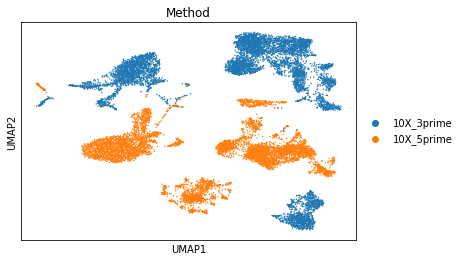

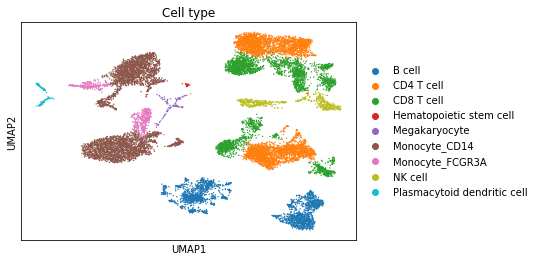

In [17]:
sc.pl.umap(pbmc, color='Method')
sc.pl.umap(pbmc, color='Cell type')